In [190]:
# !pip install nba-api
# !pip install Keras

In [191]:
# from google.colab import drive
# drive.mount('/content/drive')

In [192]:
# dependencies

# basic
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix
import plotly.express as px
import requests
import seaborn as sns
import time

# nba api
import nba_api
from nba_api.stats.endpoints import BoxScoreDefensive, BoxScoreMiscV2, BoxScorePlayerTrackV2, BoxScoreUsageV2
from nba_api.stats.static import teams
from nba_api.stats.endpoints import LeagueGameFinder, LeagueGameLog, PlayerGameLog

# sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import SVC

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#save ml models
import joblib

In [244]:
plt.style.use('seaborn')

-------
# csv dataset
-------

In [193]:
# df_final = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/gamestatsfinal_version_3.csv')
df_final = pd.read_csv('../resources/current_all_boxscores.csv')

In [194]:
df_final

,Unnamed: 0,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,CFGA,CFGM,CFG_PCT,...,UFG_PCT,USG_PCT,GAMESCORE,EFG_EVAL,EFG_TEAM_AVG,TS_EVAL,TS_TEAM_AVG,MIN_FLAT,WL,Home/Away
0,0,0.207,23.1,1.20,6,2,0,9,5,0.556,...,0.167,0.208,5.9,-0.102500,0.535500,-0.166167,0.575167,41.0,L,AWAY
1,1,0.227,18.5,2.50,5,2,0,9,5,0.556,...,0.300,0.272,15.7,-0.061500,0.535500,-0.045167,0.575167,35.0,L,AWAY
2,2,0.118,22.2,2.00,2,1,0,3,3,1.000,...,0.000,0.137,4.6,-0.035500,0.535500,-0.075167,0.575167,20.0,L,AWAY
3,3,0.056,7.7,0.33,1,0,0,2,1,0.500,...,0.714,0.179,9.2,0.353500,0.535500,0.313833,0.575167,27.0,L,AWAY
4,4,0.227,35.7,5.00,5,0,1,2,0,0.000,...,0.400,0.153,7.1,-0.106500,0.535500,-0.067167,0.575167,24.0,L,AWAY
5,5,0.067,7.7,1.00,1,1,1,5,2,0.400,...,0.500,0.174,13.7,0.075500,0.535500,0.121833,0.575167,28.0,L,AWAY
6,6,0.000,0.0,0.00,0,1,0,3,3,1.000,...,0.000,0.152,6.6,0.464500,0.535500,0.350833,0.575167,12.0,L,AWAY
7,7,0.400,22.2,0.00,2,0,0,2,0,0.000,...,0.000,0.212,3.6,-0.178500,0.535500,-0.218167,0.575167,12.0,L,AWAY
8,8,0.286,15.4,2.00,2,0,1,2,0,0.000,...,0.125,0.333,-0.4,-0.385500,0.535500,-0.425167,0.575167,11.0,L,AWAY
9,9,0.231,33.3,3.00,3,2,0,2,0,0.000,...,0.000,0.125,4.7,-0.535500,0.535500,-0.293167,0.575167,18.0,L,AWAY


In [195]:
# fix gameid column w/ leading zeros
df_final['GAME_ID'] = df_final['GAME_ID'].map(lambda x: f'{x:0>10}')

In [196]:
df_final.head()

,Unnamed: 0,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,CFGA,CFGM,CFG_PCT,...,UFG_PCT,USG_PCT,GAMESCORE,EFG_EVAL,EFG_TEAM_AVG,TS_EVAL,TS_TEAM_AVG,MIN_FLAT,WL,Home/Away
0,0,0.207,23.1,1.20,6,2,0,9,5,0.556,...,0.167,0.208,5.9,-0.1025,0.5355,-0.166167,0.575167,41.0,L,AWAY
1,1,0.227,18.5,2.50,5,2,0,9,5,0.556,...,0.300,0.272,15.7,-0.0615,0.5355,-0.045167,0.575167,35.0,L,AWAY
2,2,0.118,22.2,2.00,2,1,0,3,3,1.000,...,0.000,0.137,4.6,-0.0355,0.5355,-0.075167,0.575167,20.0,L,AWAY
3,3,0.056,7.7,0.33,1,0,0,2,1,0.500,...,0.714,0.179,9.2,0.3535,0.5355,0.313833,0.575167,27.0,L,AWAY
4,4,0.227,35.7,5.00,5,0,1,2,0,0.000,...,0.400,0.153,7.1,-0.1065,0.5355,-0.067167,0.575167,24.0,L,AWAY


# feature selection

In [197]:
list(df_final.keys())

['Unnamed: 0',
 'AST_PCT',
 'AST_RATIO',
 'AST_TOV',
 'AST',
 'BLK',
 'BLKA',
 'CFGA',
 'CFGM',
 'CFG_PCT',
 'COMMENT',
 'DEF_RATING',
 'DFGA',
 'DFGM',
 'DFG_PCT',
 'DIST',
 'DRBC',
 'DREB_PCT',
 'DREB',
 'EFG_PCT',
 'E_DEF_RATING',
 'E_NET_RATING',
 'E_OFF_RATING',
 'E_PACE',
 'E_USG_PCT',
 'FG3A',
 'FG3M',
 'FG3_PCT',
 'FGA',
 'FGM',
 'FG_PCT',
 'FTA',
 'FTAST',
 'FTM',
 'FT_PCT',
 'GAME_ID',
 'MATCHUP_AST',
 'MATCHUP_FG3A',
 'MATCHUP_FG3M',
 'MATCHUP_FG3_PCT',
 'MATCHUP_FGA',
 'MATCHUP_FGM',
 'MATCHUP_FG_PCT',
 'MATCHUP_MIN',
 'MATCHUP_TOV',
 'MIN',
 'NET_RATING',
 'OFF_RATING',
 'OPP_PTS_2ND_CHANCE',
 'OPP_PTS_FB',
 'OPP_PTS_OFF_TOV',
 'OPP_PTS_PAINT',
 'ORBC',
 'OREB',
 'OREB_PCT',
 'PACE',
 'PACE_PER40',
 'PARTIAL_POSS',
 'PASS',
 'PCT_AST',
 'PCT_BLK',
 'PCT_BLKA',
 'PCT_DREB',
 'PCT_FG3A',
 'PCT_FG3M',
 'PCT_FGA',
 'PCT_FGM',
 'PCT_FTA',
 'PCT_FTM',
 'PCT_OREB',
 'PCT_PF',
 'PCT_PFD',
 'PCT_PTS',
 'PCT_REB',
 'PCT_STL',
 'PCT_TOV',
 'PFD',
 'PF',
 'PIE',
 'PLAYER_ID',
 'PLAYER

In [198]:
features = [
    
#   target
    'WL',
    
#   traditional
    'PTS',
    'AST',
    'PF',
#   'DEF_RATING',
#   'OFF_RATING',
    'FG_PCT',
    'FG3M',
    'FTM',
    'FGM',
    'STL',
    'TOV',
    'Home/Away',
    
#   minutes/usage/possession
    'MIN_FLAT',
    'USG_PCT',
    'POSS',
    
#   point types
    'PTS_2ND_CHANCE',
    'PTS_FB',
    'PTS_OFF_TOV',
    'PTS_PAINT',

#   advanced
    'GAMESCORE',
    'EFG_PCT',
    'TS_PCT',
#   eval => pct above or below team average
    'EFG_EVAL',
    'TS_EVAL',
#   team average
    'EFG_TEAM_AVG',
    'TS_TEAM_AVG',
    
#   granular
    'SPD', # speed
    'DIST', # distance
    'ORBC', # oreb chances
    'DRBC', # dreb chances
    'RBC', # reb chances
    'TCHS', # touches
    'SAST', # secondary assists
    'FTAST', # free throw assists
    'PFD', # personal fouls drawn
    'PASS', # passes
    'CFGM', # contested fgm
    'CFGA', # contested fga
    'CFG_PCT', # contested fg pct
    'UFGM', # uncontested fgm
    'UFGA', # uncontested fga
    'UFG_PCT', # uncontested fg pct
    'DFGM', # defended fgm
    'DFGA', # defended fga
    'DFG_PCT', # defended df pct
    
#   percent of team stats
    'PCT_FGM',
    'PCT_FGA',
    'PCT_FG3M',
    'PCT_FG3A',
    'PCT_FTM',
    'PCT_FTA',
    'PCT_OREB',
    'PCT_DREB',
    'PCT_REB',
    'PCT_AST',
    'PCT_TOV',
    'PCT_STL',
    'PCT_BLK',
    'PCT_BLKA',
    'PCT_PF',
    'PCT_PFD',
    'PCT_PTS',
    
#     arena
#    'Capacity_pct',
#    'Capacity',
    
]

In [199]:
len(features)

61

--------
# svc model
--------

In [200]:
df_svc = df_final[features].copy()

In [201]:
df_svc.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,L,13,6,2,0.400,1,0,6,0,5,...,0.071,0.118,0.250,0.333,0.0,0.333,0.0,0.077,0.111,0.134
1,L,22,5,4,0.421,2,4,8,1,2,...,0.208,0.179,0.238,0.143,1.0,0.400,0.0,0.190,0.375,0.278
2,L,6,2,5,0.500,0,0,3,0,1,...,0.429,0.438,0.154,0.125,0.0,0.333,0.0,0.385,0.000,0.113
3,L,16,1,3,0.667,4,0,6,0,3,...,0.100,0.083,0.063,0.250,0.0,0.000,0.0,0.200,0.182,0.254
4,L,8,5,2,0.286,2,2,2,0,1,...,0.278,0.250,0.294,0.100,0.0,0.000,1.0,0.143,0.100,0.125


In [202]:
encoder = LabelEncoder()
encoder.fit(df_svc['WL'])
y = encoder.transform(df_svc.WL)
df_svc['y'] = y

In [203]:
encoder = LabelEncoder()
encoder.fit(df_svc['Home/Away'])
home = encoder.transform(df_svc['Home/Away'])
df_svc['HOME'] = home

In [204]:
df_svc

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,y,HOME
0,L,13,6,2,0.400,1,0,6,0,5,...,0.250,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0,0
1,L,22,5,4,0.421,2,4,8,1,2,...,0.238,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0,0
2,L,6,2,5,0.500,0,0,3,0,1,...,0.154,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0,0
3,L,16,1,3,0.667,4,0,6,0,3,...,0.063,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0,0
4,L,8,5,2,0.286,2,2,2,0,1,...,0.294,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0,0
5,L,15,1,4,0.444,3,4,4,0,1,...,0.077,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0,0
6,L,8,0,3,1.000,0,2,3,0,1,...,0.000,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0,0
7,L,5,2,0,0.286,1,0,2,0,0,...,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0,0
8,L,3,2,2,0.100,1,0,1,2,1,...,0.333,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0,0
9,L,3,3,5,0.000,0,3,0,1,1,...,0.333,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0,0


In [205]:
target = df_svc['y']
data = df_svc.drop(['WL', 'y', 'Home/Away'], axis=1)
feature_names = data.columns

In [206]:
data

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.118,0.250,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,0.179,0.238,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.438,0.154,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.083,0.063,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.250,0.294,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0
5,15,1,4,0.444,3,4,4,0,1,28.0,...,0.303,0.077,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0
6,8,0,3,1.000,0,2,3,0,1,12.0,...,0.125,0.000,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0
7,5,2,0,0.286,1,0,2,0,0,12.0,...,0.167,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0
8,3,2,2,0.100,1,0,1,2,1,11.0,...,0.211,0.333,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0
9,3,3,5,0.000,0,3,0,1,1,18.0,...,0.240,0.333,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0


In [207]:
# load svc
loaded_model_svc = joblib.load('../../2019_season/wl/model_wl_svc.sav')
result = loaded_model_svc.score(data, target)
print(result)

0.5626021090152978


In [208]:
predictions_svc = loaded_model_svc.predict(data)

In [209]:
data['predictions_svc'] = predictions_svc
data['target'] = target

In [210]:
data

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_svc,target
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0,0,0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0,0,0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0,0,0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0,0,0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0,1,0
5,15,1,4,0.444,3,4,4,0,1,28.0,...,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0,1,0
6,8,0,3,1.000,0,2,3,0,1,12.0,...,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0,1,0
7,5,2,0,0.286,1,0,2,0,0,12.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0,0,0
8,3,2,2,0.100,1,0,1,2,1,11.0,...,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0,0,0
9,3,3,5,0.000,0,3,0,1,1,18.0,...,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0,0,0


In [211]:
print(classification_report(target, predictions_svc, target_names=['Loss','Win']))

              precision    recall  f1-score   support

        Loss       0.56      0.57      0.56      3365
         Win       0.56      0.56      0.56      3368

    accuracy                           0.56      6733
   macro avg       0.56      0.56      0.56      6733
weighted avg       0.56      0.56      0.56      6733



In [212]:
dfpred = pd.concat([df_final, data], axis=1)

In [213]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'predictions_svc', 'target', 'WL']].copy().dropna()

In [214]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,predictions_svc,target,WL
0,Jrue Holiday,Pelicans,0,0,L
1,Brandon Ingram,Pelicans,0,0,L
2,Derrick Favors,Pelicans,0,0,L
3,JJ Redick,Pelicans,0,0,L
4,Lonzo Ball,Pelicans,1,0,L
5,Josh Hart,Pelicans,1,0,L
6,Jahlil Okafor,Pelicans,1,0,L
7,E'Twaun Moore,Pelicans,0,0,L
8,Nickeil Alexander-Walker,Pelicans,0,0,L
9,Kenrich Williams,Pelicans,0,0,L


In [215]:
dfplayerpred['correct_svc'] = 0

In [216]:
for index, row in dfplayerpred.iterrows():
    
    if row['predictions_svc'] == row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'correct'
    if row['predictions_svc'] != row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'wrong'

In [217]:
dfplayerpred.loc[(dfplayerpred['correct_svc'] == 'correct')]

,PLAYER_NAME,TEAM_NICKNAME,predictions_svc,target,WL,correct_svc
0,Jrue Holiday,Pelicans,0,0,L,correct
1,Brandon Ingram,Pelicans,0,0,L,correct
2,Derrick Favors,Pelicans,0,0,L,correct
3,JJ Redick,Pelicans,0,0,L,correct
7,E'Twaun Moore,Pelicans,0,0,L,correct
8,Nickeil Alexander-Walker,Pelicans,0,0,L,correct
9,Kenrich Williams,Pelicans,0,0,L,correct
11,Frank Jackson,Pelicans,0,0,L,correct
14,Marc Gasol,Raptors,1,1,W,correct
15,Kyle Lowry,Raptors,1,1,W,correct


## grid

In [218]:
df_svc = df_final[features].copy()

In [219]:
df_svc.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,L,13,6,2,0.400,1,0,6,0,5,...,0.071,0.118,0.250,0.333,0.0,0.333,0.0,0.077,0.111,0.134
1,L,22,5,4,0.421,2,4,8,1,2,...,0.208,0.179,0.238,0.143,1.0,0.400,0.0,0.190,0.375,0.278
2,L,6,2,5,0.500,0,0,3,0,1,...,0.429,0.438,0.154,0.125,0.0,0.333,0.0,0.385,0.000,0.113
3,L,16,1,3,0.667,4,0,6,0,3,...,0.100,0.083,0.063,0.250,0.0,0.000,0.0,0.200,0.182,0.254
4,L,8,5,2,0.286,2,2,2,0,1,...,0.278,0.250,0.294,0.100,0.0,0.000,1.0,0.143,0.100,0.125


In [220]:
encoder = LabelEncoder()
encoder.fit(df_svc['WL'])
y = encoder.transform(df_svc.WL)
df_svc['y'] = y

encoder = LabelEncoder()
encoder.fit(df_svc['Home/Away'])
home = encoder.transform(df_svc['Home/Away'])
df_svc['HOME'] = home

target = df_svc['y']
data = df_svc.drop(['WL', 'y', 'Home/Away'], axis=1)
feature_names = data.columns

In [221]:
data

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.118,0.250,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,0.179,0.238,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.438,0.154,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.083,0.063,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.250,0.294,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0
5,15,1,4,0.444,3,4,4,0,1,28.0,...,0.303,0.077,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0
6,8,0,3,1.000,0,2,3,0,1,12.0,...,0.125,0.000,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0
7,5,2,0,0.286,1,0,2,0,0,12.0,...,0.167,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0
8,3,2,2,0.100,1,0,1,2,1,11.0,...,0.211,0.333,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0
9,3,3,5,0.000,0,3,0,1,1,18.0,...,0.240,0.333,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [223]:
# load grid model
loaded_model_svcgrid = joblib.load('../../2019_season/wl/model_wl_svcgrid.sav')
result = loaded_model_svcgrid.score(data, target)
print(result)

0.6258725679489083


In [224]:
loaded_model_svcgrid.best_score_

0.631366496497685

In [225]:
predictions_grid = loaded_model_svcgrid.predict(data)

In [226]:
len(predictions_grid)

6733

In [227]:
data['predictions_grid'] = predictions_grid
data['target'] = target

In [228]:
print(classification_report(target, predictions_grid,
                            target_names=["loss", "win"]))

              precision    recall  f1-score   support

        loss       0.62      0.65      0.64      3365
         win       0.63      0.60      0.62      3368

    accuracy                           0.63      6733
   macro avg       0.63      0.63      0.63      6733
weighted avg       0.63      0.63      0.63      6733



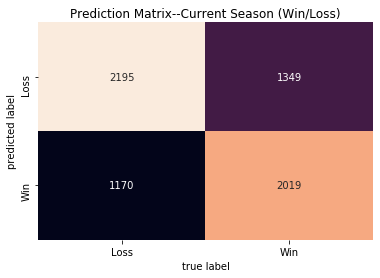

In [232]:
matrix = confusion_matrix(target, predictions_grid)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False,
            xticklabels=['Loss', 'Win'],
            yticklabels=['Loss', 'Win'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Prediction Matrix--Current Season (Win/Loss)')
plt.savefig('matrix_wl_current.png', dpi=600)

In [230]:
matrix.T

array([[2195, 1349],
       [1170, 2019]])

In [68]:
dfpred = pd.concat([df_final, data], axis=1)

In [69]:
dfpred

,Unnamed: 0,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,CFGA,CFGM,CFG_PCT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_grid,target
0,0,0.207,23.1,1.20,6,2,0,9,5,0.556,...,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0,0,0
1,1,0.227,18.5,2.50,5,2,0,9,5,0.556,...,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0,0,0
2,2,0.118,22.2,2.00,2,1,0,3,3,1.000,...,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0,0,0
3,3,0.056,7.7,0.33,1,0,0,2,1,0.500,...,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0,1,0
4,4,0.227,35.7,5.00,5,0,1,2,0,0.000,...,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0,1,0
5,5,0.067,7.7,1.00,1,1,1,5,2,0.400,...,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0,1,0
6,6,0.000,0.0,0.00,0,1,0,3,3,1.000,...,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0,0,0
7,7,0.400,22.2,0.00,2,0,0,2,0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0,0,0
8,8,0.286,15.4,2.00,2,0,1,2,0,0.000,...,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0,0,0
9,9,0.231,33.3,3.00,3,2,0,2,0,0.000,...,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0,1,0


In [71]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'predictions_grid', 'target', 'WL']].copy().dropna()

In [72]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,predictions_grid,target,WL
0,Jrue Holiday,Pelicans,0,0,L
1,Brandon Ingram,Pelicans,0,0,L
2,Derrick Favors,Pelicans,0,0,L
3,JJ Redick,Pelicans,1,0,L
4,Lonzo Ball,Pelicans,1,0,L
5,Josh Hart,Pelicans,1,0,L
6,Jahlil Okafor,Pelicans,0,0,L
7,E'Twaun Moore,Pelicans,0,0,L
8,Nickeil Alexander-Walker,Pelicans,0,0,L
9,Kenrich Williams,Pelicans,1,0,L


In [136]:
dfplayerpred['correct_grid'] = 0
dfplayerpred['wrong_grid'] = 0

In [137]:
for index, row in dfplayerpred.iterrows():
    
    if row[2] == row['target']:
        dfplayerpred.loc[index, 'correct_grid'] = 1
        
    if row[2] != row['target']:
        dfplayerpred.loc[index, 'wrong_grid'] = 1

    print(index, row[6])

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


1354 0
1355 0
1356 0
1357 0
1358 0
1359 0
1360 0
1361 0
1362 0
1363 0
1364 0
1365 0
1366 0
1367 0
1368 0
1369 0
1370 0
1371 0
1372 0
1373 0
1374 0
1375 0
1376 0
1377 0
1378 0
1379 0
1380 0
1381 0
1382 0
1383 0
1384 0
1385 0
1386 0
1387 0
1388 0
1389 0
1390 0
1391 0
1392 0
1393 0
1394 0
1395 0
1396 0
1397 0
1398 0
1399 0
1400 0
1401 0
1402 0
1403 0
1404 0
1405 0
1406 0
1407 0
1408 0
1409 0
1410 0
1411 0
1412 0
1413 0
1414 0
1415 0
1416 0
1417 0
1418 0
1419 0
1420 0
1421 0
1422 0
1423 0
1424 0
1425 0
1426 0
1427 0
1428 0
1429 0
1430 0
1431 0
1432 0
1433 0
1434 0
1435 0
1436 0
1437 0
1438 0
1439 0
1440 0
1441 0
1442 0
1443 0
1444 0
1445 0
1446 0
1447 0
1448 0
1449 0
1450 0
1451 0
1452 0
1453 0
1454 0
1455 0
1456 0
1457 0
1458 0
1459 0
1460 0
1461 0
1462 0
1463 0
1464 0
1465 0
1466 0
1467 0
1468 0
1469 0
1470 0
1471 0
1472 0
1473 0
1474 0
1475 0
1476 0
1477 0
1478 0
1479 0
1480 0
1481 0
1482 0
1483 0
1484 0
1485 0
1486 0
1487 0
1488 0
1489 0
1490 0
1491 0
1492 0
1493 0
1494 0
1495 0
1496 0

2663 0
2664 0
2665 0
2666 0
2667 0
2668 0
2669 0
2670 0
2671 0
2672 0
2673 0
2674 0
2675 0
2676 0
2677 0
2678 0
2679 0
2680 0
2681 0
2682 0
2683 0
2684 0
2685 0
2686 0
2687 0
2688 0
2689 0
2690 0
2691 0
2692 0
2693 0
2694 0
2695 0
2696 0
2697 0
2698 0
2699 0
2700 0
2701 0
2702 0
2703 0
2704 0
2705 0
2706 0
2707 0
2708 0
2709 0
2710 0
2711 0
2712 0
2713 0
2714 0
2715 0
2716 0
2717 0
2718 0
2719 0
2720 0
2721 0
2722 0
2723 0
2724 0
2725 0
2726 0
2727 0
2728 0
2729 0
2730 0
2731 0
2732 0
2733 0
2734 0
2735 0
2736 0
2737 0
2738 0
2739 0
2740 0
2741 0
2742 0
2743 0
2744 0
2745 0
2746 0
2747 0
2748 0
2749 0
2750 0
2751 0
2752 0
2753 0
2754 0
2755 0
2756 0
2757 0
2758 0
2759 0
2760 0
2761 0
2762 0
2763 0
2764 0
2765 0
2766 0
2767 0
2768 0
2769 0
2770 0
2771 0
2772 0
2773 0
2774 0
2775 0
2776 0
2777 0
2778 0
2779 0
2780 0
2781 0
2782 0
2783 0
2784 0
2785 0
2786 0
2787 0
2788 0
2789 0
2790 0
2791 0
2792 0
2793 0
2794 0
2795 0
2796 0
2797 0
2798 0
2799 0
2800 0
2801 0
2802 0
2803 0
2804 0
2805 0

4075 0
4076 0
4077 0
4078 0
4079 0
4080 0
4081 0
4082 0
4083 0
4084 0
4085 0
4086 0
4087 0
4088 0
4089 0
4090 0
4091 0
4092 0
4093 0
4094 0
4095 0
4096 0
4097 0
4098 0
4099 0
4100 0
4101 0
4102 0
4103 0
4104 0
4105 0
4106 0
4107 0
4108 0
4109 0
4110 0
4111 0
4112 0
4113 0
4114 0
4115 0
4116 0
4117 0
4118 0
4119 0
4120 0
4121 0
4122 0
4123 0
4124 0
4125 0
4126 0
4127 0
4128 0
4129 0
4130 0
4131 0
4132 0
4133 0
4134 0
4135 0
4136 0
4137 0
4138 0
4139 0
4140 0
4141 0
4142 0
4143 0
4144 0
4145 0
4146 0
4147 0
4148 0
4149 0
4150 0
4151 0
4152 0
4153 0
4154 0
4155 0
4156 0
4157 0
4158 0
4159 0
4160 0
4161 0
4162 0
4163 0
4164 0
4165 0
4166 0
4167 0
4168 0
4169 0
4170 0
4171 0
4172 0
4173 0
4174 0
4175 0
4176 0
4177 0
4178 0
4179 0
4180 0
4181 0
4182 0
4183 0
4184 0
4185 0
4186 0
4187 0
4188 0
4189 0
4190 0
4191 0
4192 0
4193 0
4194 0
4195 0
4196 0
4197 0
4198 0
4199 0
4200 0
4201 0
4202 0
4203 0
4204 0
4205 0
4206 0
4207 0
4208 0
4209 0
4210 0
4211 0
4212 0
4213 0
4214 0
4215 0
4216 0
4217 0

5481 0
5482 0
5483 0
5484 0
5485 0
5486 0
5487 0
5488 0
5489 0
5490 0
5491 0
5492 0
5493 0
5494 0
5495 0
5496 0
5497 0
5498 0
5499 0
5500 0
5501 0
5502 0
5503 0
5504 0
5505 0
5506 0
5507 0
5508 0
5509 0
5510 0
5511 0
5512 0
5513 0
5514 0
5515 0
5516 0
5517 0
5518 0
5519 0
5520 0
5521 0
5522 0
5523 0
5524 0
5525 0
5526 0
5527 0
5528 0
5529 0
5530 0
5531 0
5532 0
5533 0
5534 0
5535 0
5536 0
5537 0
5538 0
5539 0
5540 0
5541 0
5542 0
5543 0
5544 0
5545 0
5546 0
5547 0
5548 0
5549 0
5550 0
5551 0
5552 0
5553 0
5554 0
5555 0
5556 0
5557 0
5558 0
5559 0
5560 0
5561 0
5562 0
5563 0
5564 0
5565 0
5566 0
5567 0
5568 0
5569 0
5570 0
5571 0
5572 0
5573 0
5574 0
5575 0
5576 0
5577 0
5578 0
5579 0
5580 0
5581 0
5582 0
5583 0
5584 0
5585 0
5586 0
5587 0
5588 0
5589 0
5590 0
5591 0
5592 0
5593 0
5594 0
5595 0
5596 0
5597 0
5598 0
5599 0
5600 0
5601 0
5602 0
5603 0
5604 0
5605 0
5606 0
5607 0
5608 0
5609 0
5610 0
5611 0
5612 0
5613 0
5614 0
5615 0
5616 0
5617 0
5618 0
5619 0
5620 0
5621 0
5622 0
5623 0

In [138]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,predictions_grid,target,WL,correct_grid,wrong_grid
0,Jrue Holiday,Pelicans,0,0,L,1,0
1,Brandon Ingram,Pelicans,0,0,L,1,0
2,Derrick Favors,Pelicans,0,0,L,1,0
3,JJ Redick,Pelicans,1,0,L,0,1
4,Lonzo Ball,Pelicans,1,0,L,0,1
5,Josh Hart,Pelicans,1,0,L,0,1
6,Jahlil Okafor,Pelicans,0,0,L,1,0
7,E'Twaun Moore,Pelicans,0,0,L,1,0
8,Nickeil Alexander-Walker,Pelicans,0,0,L,1,0
9,Kenrich Williams,Pelicans,1,0,L,0,1


In [139]:
groupbygrid = dfplayerpred.groupby(by='PLAYER_NAME').sum()[['correct_grid', 'wrong_grid']].copy()

In [140]:
df = pd.DataFrame(groupbygrid)
df['differential_grid'] = 0
df['correct_grid_pct'] = 0
df['wrong_grid_pct'] = 0

In [142]:
for index, row in df.iterrows():
    
    for index, row in df.iterrows():
        differential = (row['correct_grid'] - row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
        df.loc[index, 'differential_grid'] = differential

        correct_pct = (row['correct_grid']) / (row['correct_grid'] + row['wrong_grid'])
        df.loc[index, 'correct_grid_pct'] = correct_pct

        wrong_pct = (row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
        df.loc[index, 'wrong_grid_pct'] = wrong_pct
    

In [144]:
df

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Aaron Gordon,12,6,0.333333,0.666667,0.333333
Aaron Holiday,12,7,0.263158,0.631579,0.368421
Abdel Nader,8,5,0.230769,0.615385,0.384615
Admiral Schofield,3,4,-0.142857,0.428571,0.571429
Al Horford,15,5,0.500000,0.750000,0.250000
Al-Farouq Aminu,13,5,0.444444,0.722222,0.277778
Alec Burks,10,10,0.000000,0.500000,0.500000
Alex Caruso,9,11,-0.100000,0.450000,0.550000
Alex Len,10,11,-0.047619,0.476190,0.523810


----------
# neural net
----------

In [79]:
df_nnet = df_final[features]

In [80]:
data = df_nnet.copy()

In [81]:
data.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,L,13,6,2,0.400,1,0,6,0,5,...,0.071,0.118,0.250,0.333,0.0,0.333,0.0,0.077,0.111,0.134
1,L,22,5,4,0.421,2,4,8,1,2,...,0.208,0.179,0.238,0.143,1.0,0.400,0.0,0.190,0.375,0.278
2,L,6,2,5,0.500,0,0,3,0,1,...,0.429,0.438,0.154,0.125,0.0,0.333,0.0,0.385,0.000,0.113
3,L,16,1,3,0.667,4,0,6,0,3,...,0.100,0.083,0.063,0.250,0.0,0.000,0.0,0.200,0.182,0.254
4,L,8,5,2,0.286,2,2,2,0,1,...,0.278,0.250,0.294,0.100,0.0,0.000,1.0,0.143,0.100,0.125


In [82]:
encoder = LabelEncoder()
encoder.fit(data['WL'])
encoder.classes_
y = encoder.transform(data.WL)
y

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
encoder = LabelEncoder()
encoder.fit(data['Home/Away'])
home = encoder.transform(data['Home/Away'])
data['HOME'] = home

In [84]:
data.drop(columns=['WL','Home/Away'], inplace=True)

X = data
X

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.118,0.250,0.333,0.000,0.333,0.000,0.077,0.111,0.134,0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,0.179,0.238,0.143,1.000,0.400,0.000,0.190,0.375,0.278,0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.438,0.154,0.125,0.000,0.333,0.000,0.385,0.000,0.113,0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.083,0.063,0.250,0.000,0.000,0.000,0.200,0.182,0.254,0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.250,0.294,0.100,0.000,0.000,1.000,0.143,0.100,0.125,0
5,15,1,4,0.444,3,4,4,0,1,28.0,...,0.303,0.077,0.111,0.000,0.200,0.500,0.200,0.286,0.259,0
6,8,0,3,1.000,0,2,3,0,1,12.0,...,0.125,0.000,0.500,0.000,0.500,0.000,0.300,0.571,0.364,0
7,5,2,0,0.286,1,0,2,0,0,12.0,...,0.167,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.238,0
8,3,2,2,0.100,1,0,1,2,1,11.0,...,0.211,0.333,0.250,1.000,0.000,1.000,0.250,0.333,0.120,0
9,3,3,5,0.000,0,3,0,1,1,18.0,...,0.240,0.333,0.200,0.333,0.500,0.000,0.385,0.125,0.070,0


In [85]:
len(y), len(X)

(6733, 6733)

In [86]:
y_categorical = to_categorical(y)
y_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [87]:
X_scaler = MinMaxScaler().fit(X)
y_scaler = MinMaxScaler().fit(y_categorical)

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [91]:
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y_categorical)

In [96]:
# pretrained model
loaded_model_nnet = load_model('../../2019_season/wl/model_wl_nnet.h5')
result = loaded_model_nnet.evaluate(X_scaled, y_scaled, verbose=2)
print(result)

6733/1 - 0s - loss: 0.7477 - accuracy: 0.6584
[0.6424966195832562, 0.6583989]


In [98]:
# predictions_nnet = loaded_model_nnet.predict(X_test_scaled)
# predictions_nnet

predictions_nnet = loaded_model_nnet.predict(X_scaled)
predictions_nnet

array([[0.7922944 , 0.20770559],
       [0.9784856 , 0.02151436],
       [0.7263806 , 0.2736194 ],
       ...,
       [0.45973048, 0.5402695 ],
       [0.7005473 , 0.2994527 ],
       [0.51476574, 0.48523423]], dtype=float32)

In [104]:
list(y)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [106]:
# add predictions to df here and merge with grid pred df
# X_test['nnet_pred_loss_0'] = predictions_nnet[:,0]
# X_test['nnet_pred_win_1'] = predictions_nnet[:,1]
# X_test['WL_TARGET'] = y_test[:,1]

# add predictions to df here and merge with grid pred df
X['nnet_pred_loss_0'] = predictions_nnet[:,0]
X['nnet_pred_win_1'] = predictions_nnet[:,1]
X['WL_TARGET'] = y_categorical[:,1]


In [107]:
# X_test

X

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.000,0.333,0.000,0.077,0.111,0.134,0,0.792294,0.207706,0.0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,1.000,0.400,0.000,0.190,0.375,0.278,0,0.978486,0.021514,0.0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.000,0.333,0.000,0.385,0.000,0.113,0,0.726381,0.273619,0.0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.000,0.000,0.000,0.200,0.182,0.254,0,0.634266,0.365733,0.0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.000,0.000,1.000,0.143,0.100,0.125,0,0.255256,0.744744,0.0
5,15,1,4,0.444,3,4,4,0,1,28.0,...,0.000,0.200,0.500,0.200,0.286,0.259,0,0.863729,0.136271,0.0
6,8,0,3,1.000,0,2,3,0,1,12.0,...,0.000,0.500,0.000,0.300,0.571,0.364,0,0.690131,0.309869,0.0
7,5,2,0,0.286,1,0,2,0,0,12.0,...,0.000,0.000,0.000,0.000,0.000,0.238,0,0.671228,0.328772,0.0
8,3,2,2,0.100,1,0,1,2,1,11.0,...,1.000,0.000,1.000,0.250,0.333,0.120,0,0.241268,0.758732,0.0
9,3,3,5,0.000,0,3,0,1,1,18.0,...,0.333,0.500,0.000,0.385,0.125,0.070,0,0.394097,0.605903,0.0


In [109]:
# dfprednnet = pd.concat([df_final, X_test], axis=1)[['PLAYER_NAME', 'TEAM_NICKNAME', 'MATCHUP', 'nnet_pred_loss_0', 'nnet_pred_win_1', 'WL_TARGET', 'WL']].copy().dropna()

dfprednnet = pd.concat([df_final, X], axis=1)[['PLAYER_NAME', 'TEAM_NICKNAME', 'nnet_pred_loss_0', 'nnet_pred_win_1', 'WL_TARGET', 'WL']].copy().dropna()

In [110]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL
0,Jrue Holiday,Pelicans,0.792294,0.207706,0.0,L
1,Brandon Ingram,Pelicans,0.978486,0.021514,0.0,L
2,Derrick Favors,Pelicans,0.726381,0.273619,0.0,L
3,JJ Redick,Pelicans,0.634266,0.365733,0.0,L
4,Lonzo Ball,Pelicans,0.255256,0.744744,0.0,L
5,Josh Hart,Pelicans,0.863729,0.136271,0.0,L
6,Jahlil Okafor,Pelicans,0.690131,0.309869,0.0,L
7,E'Twaun Moore,Pelicans,0.671228,0.328772,0.0,L
8,Nickeil Alexander-Walker,Pelicans,0.241268,0.758732,0.0,L
9,Kenrich Williams,Pelicans,0.394097,0.605903,0.0,L


In [111]:
dfprednnet['nnet_eval'] = 0
dfprednnet['nnet_total'] = 1

In [112]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
0,Jrue Holiday,Pelicans,0.792294,0.207706,0.0,L,0,1
1,Brandon Ingram,Pelicans,0.978486,0.021514,0.0,L,0,1
2,Derrick Favors,Pelicans,0.726381,0.273619,0.0,L,0,1
3,JJ Redick,Pelicans,0.634266,0.365733,0.0,L,0,1
4,Lonzo Ball,Pelicans,0.255256,0.744744,0.0,L,0,1
5,Josh Hart,Pelicans,0.863729,0.136271,0.0,L,0,1
6,Jahlil Okafor,Pelicans,0.690131,0.309869,0.0,L,0,1
7,E'Twaun Moore,Pelicans,0.671228,0.328772,0.0,L,0,1
8,Nickeil Alexander-Walker,Pelicans,0.241268,0.758732,0.0,L,0,1
9,Kenrich Williams,Pelicans,0.394097,0.605903,0.0,L,0,1


In [113]:
for index, row in dfprednnet.iterrows():
    
    if dfprednnet.loc[index, 'nnet_pred_loss_0'] > 0.5 and row['WL_TARGET'] == 0.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1
    
    if dfprednnet.loc[index, 'nnet_pred_win_1'] > 0.5 and row['WL_TARGET'] == 1.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1


In [114]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
0,Jrue Holiday,Pelicans,0.792294,0.207706,0.0,L,1,1
1,Brandon Ingram,Pelicans,0.978486,0.021514,0.0,L,1,1
2,Derrick Favors,Pelicans,0.726381,0.273619,0.0,L,1,1
3,JJ Redick,Pelicans,0.634266,0.365733,0.0,L,1,1
4,Lonzo Ball,Pelicans,0.255256,0.744744,0.0,L,0,1
5,Josh Hart,Pelicans,0.863729,0.136271,0.0,L,1,1
6,Jahlil Okafor,Pelicans,0.690131,0.309869,0.0,L,1,1
7,E'Twaun Moore,Pelicans,0.671228,0.328772,0.0,L,1,1
8,Nickeil Alexander-Walker,Pelicans,0.241268,0.758732,0.0,L,0,1
9,Kenrich Williams,Pelicans,0.394097,0.605903,0.0,L,0,1


In [115]:
dfprednnet['nnet_eval'].value_counts() / len(dfprednnet['nnet_eval'])

1    0.658399
0    0.341601
Name: nnet_eval, dtype: float64

In [116]:
len(dfprednnet['nnet_eval'])

6733

In [117]:
groupbynnet = dfprednnet.groupby(by='PLAYER_NAME').sum()[['nnet_eval','nnet_total']].copy()

In [118]:
groupbynnet

,nnet_eval,nnet_total
PLAYER_NAME,,
Aaron Gordon,16,18
Aaron Holiday,11,19
Abdel Nader,7,13
Admiral Schofield,4,7
Al Horford,13,20
Al-Farouq Aminu,16,18
Alec Burks,15,20
Alex Caruso,11,20
Alex Len,18,21


In [119]:
dfnnet = pd.DataFrame(groupbynnet)
dfnnet['differential_nnet'] = 0
dfnnet['nnet_wrong'] = 0
dfnnet['nnet_wrong_pct'] = 0
dfnnet['nnet_correct_pct'] = 0

for index, row in dfnnet.iterrows():
    
    total_nnet = row['nnet_total']
    
    correct_nnet = row['nnet_eval']
    
    wrong_nnet = total_nnet - correct_nnet
    dfnnet.loc[index, 'nnet_wrong'] = wrong_nnet
    
    differential_nnet = (correct_nnet - wrong_nnet) / total_nnet
    dfnnet.loc[index, 'differential_nnet'] = differential_nnet
    
    correct_pct = correct_nnet / total_nnet
    dfnnet.loc[index, 'nnet_correct_pct'] = correct_pct

    wrong_pct = wrong_nnet / total_nnet
    dfnnet.loc[index, 'nnet_wrong_pct'] = wrong_pct

In [120]:
# dfnnet.sort_values(by='differential_nnet').head(20)
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Aaron Gordon,16,18,0.777778,2,0.111111,0.888889
Aaron Holiday,11,19,0.157895,8,0.421053,0.578947
Abdel Nader,7,13,0.076923,6,0.461538,0.538462
Admiral Schofield,4,7,0.142857,3,0.428571,0.571429
Al Horford,13,20,0.300000,7,0.350000,0.650000
Al-Farouq Aminu,16,18,0.777778,2,0.111111,0.888889
Alec Burks,15,20,0.500000,5,0.250000,0.750000
Alex Caruso,11,20,0.100000,9,0.450000,0.550000
Alex Len,18,21,0.714286,3,0.142857,0.857143


## predictions df

In [132]:
df

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Aaron Gordon,18,0,1.0,1.0,0.0
Aaron Holiday,19,0,1.0,1.0,0.0
Abdel Nader,13,0,1.0,1.0,0.0
Admiral Schofield,7,0,1.0,1.0,0.0
Al Horford,20,0,1.0,1.0,0.0
Al-Farouq Aminu,18,0,1.0,1.0,0.0
Alec Burks,20,0,1.0,1.0,0.0
Alex Caruso,20,0,1.0,1.0,0.0
Alex Len,21,0,1.0,1.0,0.0


In [131]:
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Aaron Gordon,16,18,0.777778,2,0.111111,0.888889
Aaron Holiday,11,19,0.157895,8,0.421053,0.578947
Abdel Nader,7,13,0.076923,6,0.461538,0.538462
Admiral Schofield,4,7,0.142857,3,0.428571,0.571429
Al Horford,13,20,0.300000,7,0.350000,0.650000
Al-Farouq Aminu,16,18,0.777778,2,0.111111,0.888889
Alec Burks,15,20,0.500000,5,0.250000,0.750000
Alex Caruso,11,20,0.100000,9,0.450000,0.550000
Alex Len,18,21,0.714286,3,0.142857,0.857143


In [145]:
df_prediction_eval = pd.concat([df, dfnnet], axis=1)[['nnet_correct_pct',
                                                      'nnet_wrong_pct',
                                                      'correct_grid_pct',
                                                      'wrong_grid_pct']]

In [146]:
df_prediction_eval

,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Aaron Gordon,0.888889,0.111111,0.666667,0.333333
Aaron Holiday,0.578947,0.421053,0.631579,0.368421
Abdel Nader,0.538462,0.461538,0.615385,0.384615
Admiral Schofield,0.571429,0.428571,0.428571,0.571429
Al Horford,0.650000,0.350000,0.750000,0.250000
Al-Farouq Aminu,0.888889,0.111111,0.722222,0.277778
Alec Burks,0.750000,0.250000,0.500000,0.500000
Alex Caruso,0.550000,0.450000,0.450000,0.550000
Alex Len,0.857143,0.142857,0.476190,0.523810


In [149]:
data = df_prediction_eval[['nnet_correct_pct', 
                           'nnet_wrong_pct',
                           'correct_grid_pct',
                           'wrong_grid_pct']].sort_values(by='nnet_correct_pct', ascending=False)[:]

# cannot match order of both subplots properly with name col instead of indexed
# data = df_prediction_eval[['nnet_correct_pct', 
#                            'nnet_wrong_pct',
#                            'correct_grid_pct',
#                            'wrong_grid_pct',
#                           'PLAYER_NAME',
#                           ]]

# data.sort_values(by='PLAYER_NAME', ascending=False, inplace=True)


# create subplot
fig = make_subplots(
    rows=1, cols=2,
#     subplot_titles=('Neural Net', 'SVM'),
    shared_yaxes=True,
    shared_xaxes=True
)

# correct nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_correct_pct'],
        name='Net Correct %',
        marker_color='teal',
        orientation='h',
        hovertext=data['nnet_correct_pct']),
    row=1, col=1,
)

# wrong nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_wrong_pct'],
        name='Net: Wrong %',
        marker_color='goldenrod',
        orientation='h',
        hovertext=data['nnet_wrong_pct']),
    row=1, col=1,
)

# correct svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['correct_grid_pct'],
        name='SVM: Correct %',
        marker_color='teal',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# wrong svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['wrong_grid_pct'],
        name='SVM: Wrong %',
        marker_color='goldenrod',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# axes, title, etc.
fig.update_layout(
    xaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='Net',
        titlefont=dict(size=20),
    ),
    
    xaxis2=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='SVM',
        titlefont=dict(size=20),
    ),
    
    yaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=True,
#         title_text='Players',
        ticktext=data.index.values,
        tickmode='array',
        titlefont=dict(size=20),
    ),
    title={
        'text': 'Win/Loss Predictions (2020 Season to Date)',
        'y':.995,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font':{
            'size':30
        }
    },
    
    annotations=[
        go.layout.Annotation(
            x=.5,
            y=-.0125,
            showarrow=False,
            text='Prediction Accuracy per Player',
            xref="paper",
            yref="paper",
            font=dict(
                size=20,
            )
        ),
        
        go.layout.Annotation(
            x=.15,
            y=1.005,
            showarrow=False,
            text='Neural Net',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
        
        go.layout.Annotation(
            x=.80,
            y=1.005,
            showarrow=False,
            text='SVM',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
    ],
    barmode='stack',
    xaxis_tickformat='%',
    xaxis2_tickformat='%',
    paper_bgcolor='rgb(248, 248, 248)',
    plot_bgcolor='rgb(248, 248, 248)',
    margin=dict(l=75, r=75, t=100, b=75),
    showlegend=True,
    autosize=False,
    width=900, height=8000,
)

fig.show()

# random forest

In [233]:
df_forest = df_final[features].copy()

In [234]:
target = df_forest["WL"]
target_names = ["W", "L"]

In [235]:
encoder = LabelEncoder()
encoder.fit(df_forest['Home/Away'])
home = encoder.transform(df_forest['Home/Away'])
df_forest['HOME'] = home

In [236]:
data = df_forest.drop(["WL",'Home/Away'], axis=1)
feature_names = data.columns
data.head()

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,13,6,2,0.400,1,0,6,0,5,41.0,...,0.118,0.250,0.333,0.0,0.333,0.0,0.077,0.111,0.134,0
1,22,5,4,0.421,2,4,8,1,2,35.0,...,0.179,0.238,0.143,1.0,0.400,0.0,0.190,0.375,0.278,0
2,6,2,5,0.500,0,0,3,0,1,20.0,...,0.438,0.154,0.125,0.0,0.333,0.0,0.385,0.000,0.113,0
3,16,1,3,0.667,4,0,6,0,3,27.0,...,0.083,0.063,0.250,0.0,0.000,0.0,0.200,0.182,0.254,0
4,8,5,2,0.286,2,2,2,0,1,24.0,...,0.250,0.294,0.100,0.0,0.000,1.0,0.143,0.100,0.125,0


In [237]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [238]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8794536817102138

In [250]:
clffeatures = sorted(zip(clf.feature_importances_, feature_names), reverse=True)
clffeatures

[(0.43475554934662836, 'TS_TEAM_AVG'),
 (0.3300524337598873, 'EFG_TEAM_AVG'),
 (0.02409653866991813, 'HOME'),
 (0.014192845890655236, 'GAMESCORE'),
 (0.014092280647471929, 'SPD'),
 (0.013441931471402425, 'POSS'),
 (0.012279830898580157, 'PASS'),
 (0.008117664574282542, 'EFG_PCT'),
 (0.008058897762583095, 'PCT_PFD'),
 (0.0075873463775717786, 'PCT_DREB'),
 (0.00706567456654359, 'PCT_FGM'),
 (0.006265019772026509, 'PCT_AST'),
 (0.006041248919665014, 'MIN_FLAT'),
 (0.006022894073914694, 'PTS_OFF_TOV'),
 (0.005658296971727725, 'PCT_FG3A'),
 (0.004888666466195647, 'TS_PCT'),
 (0.004713574593012366, 'PCT_TOV'),
 (0.004380084503910524, 'CFGM'),
 (0.003983905509605824, 'FTAST'),
 (0.00398263110145924, 'PCT_PTS'),
 (0.0039232574035308505, 'PTS_2ND_CHANCE'),
 (0.003901859452410701, 'USG_PCT'),
 (0.003744070240222566, 'PCT_PF'),
 (0.003724831370651105, 'PCT_BLKA'),
 (0.003680132136602766, 'UFG_PCT'),
 (0.003452742241658364, 'TS_EVAL'),
 (0.003381364091697021, 'FGM'),
 (0.0033608621879837527, 'DFGA

In [239]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.668646080760095

In [247]:
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
features

[(0.07100906857081399, 'TS_TEAM_AVG'),
 (0.0673056334509294, 'EFG_TEAM_AVG'),
 (0.030199020193838633, 'GAMESCORE'),
 (0.0298196658620062, 'TS_EVAL'),
 (0.028649985541372734, 'EFG_EVAL'),
 (0.02629310745952826, 'SPD'),
 (0.02427034477669309, 'PCT_FGA'),
 (0.023743345124444145, 'USG_PCT'),
 (0.023561986465817548, 'DIST'),
 (0.023536951025285288, 'PCT_PTS'),
 (0.023334132290425254, 'POSS'),
 (0.02240483105660532, 'TCHS'),
 (0.021685512764374255, 'PASS'),
 (0.02150041328111411, 'PCT_FGM'),
 (0.021326883392271758, 'PCT_REB'),
 (0.021026454202148628, 'PCT_DREB'),
 (0.02047245533463513, 'TS_PCT'),
 (0.019466314874754066, 'PCT_FG3A'),
 (0.019309285402066778, 'MIN_FLAT'),
 (0.018837810811593438, 'PCT_AST'),
 (0.01798229439565241, 'PCT_PF'),
 (0.016431508692518956, 'HOME'),
 (0.016229186024934228, 'RBC'),
 (0.016219604101628194, 'PCT_PFD'),
 (0.016095734325244755, 'EFG_PCT'),
 (0.01590585004776315, 'DRBC'),
 (0.015703892268867304, 'PCT_TOV'),
 (0.015245054583460153, 'FG_PCT'),
 (0.01394367469752

In [241]:
df_feature_importance = pd.DataFrame(features)
df_feature_importance.rename(columns={0:'pct', 1:'feature'}, inplace=True)
df_feature_importance.sort_values(by='pct', ascending=False, inplace=True)
df_feature_importance

,pct,feature
0,0.071009,TS_TEAM_AVG
1,0.067306,EFG_TEAM_AVG
2,0.030199,GAMESCORE
3,0.029820,TS_EVAL
4,0.028650,EFG_EVAL
5,0.026293,SPD
6,0.024270,PCT_FGA
7,0.023743,USG_PCT
8,0.023562,DIST
9,0.023537,PCT_PTS


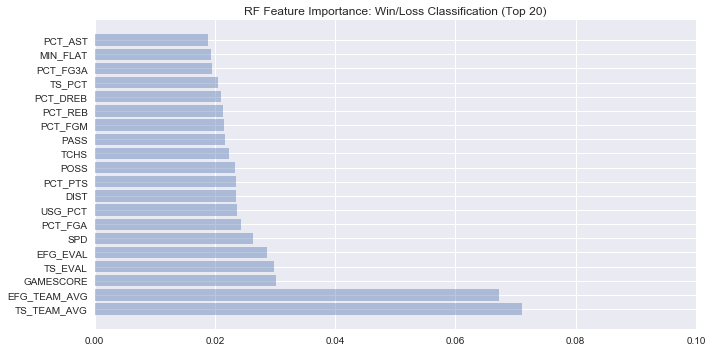

In [245]:
names = df_feature_importance['feature'][:20]

values = df_feature_importance['pct'][:20]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.1))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification (Top 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_current_top20.png', dpi=600)

plt.show()

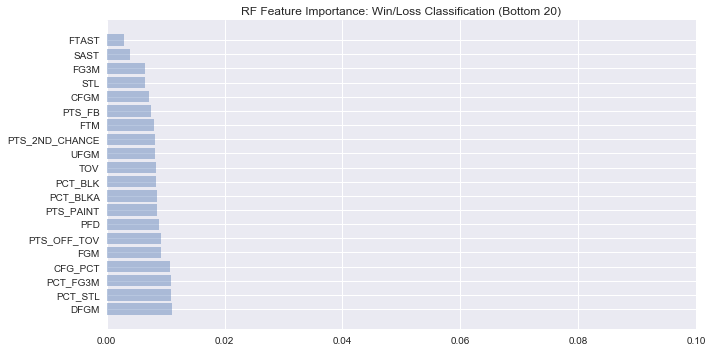

In [246]:
names = df_feature_importance['feature'].tail(20)

values = df_feature_importance['pct'].tail(20)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.1))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification (Bottom 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_current_bottom20.png', dpi=600)

plt.show()